In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sensor_verileri.csv')
df =  df.iloc[:, -2:]
df.columns = ['Time', 'Sonuc']
df.head()
veri = df.copy()

In [3]:
veri['Sonuc'] = veri['Sonuc'].replace({0: 'hareketsiz', 1: 'yurume', 2: 'kosma', 3: 'dusme'})
veri

,Time,Sonuc
0,2023-12-11 16:28:11,hareketsiz
1,2023-12-11 16:28:15,kosma
2,2023-12-11 16:28:18,kosma
3,2023-12-11 16:28:22,kosma
4,2023-12-11 16:28:25,kosma
5,2023-12-11 16:28:29,kosma
6,2023-12-11 16:28:32,yurume
7,2023-12-11 16:28:36,yurume
8,2023-12-11 16:28:39,yurume
9,2023-12-11 16:28:43,dusme


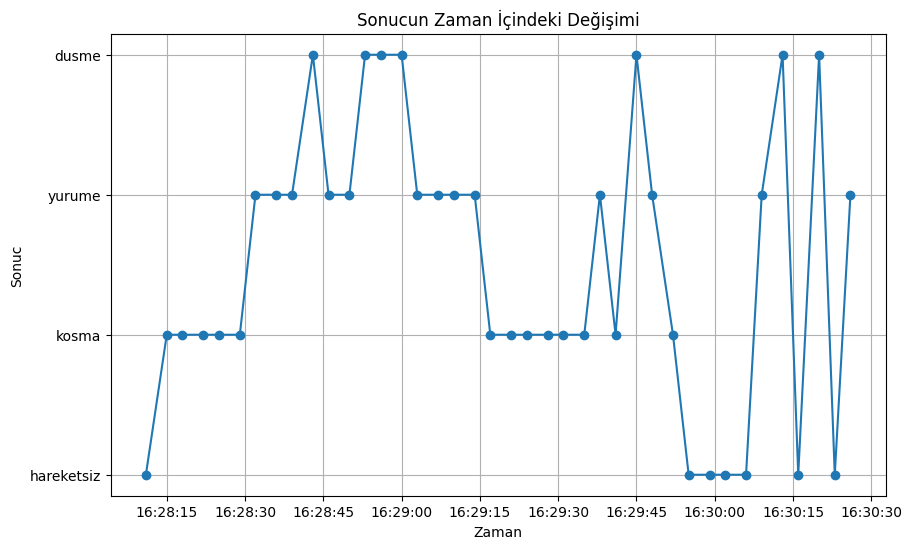

In [4]:
veri['Time'] = pd.to_datetime(veri['Time'])

# Sonucun zaman içindeki değişimini görselleştir
plt.figure(figsize=(10, 6))
plt.plot(veri['Time'], veri['Sonuc'], marker='o', linestyle='-')
plt.xlabel('Zaman')
plt.ylabel('Sonuc')
plt.title('Sonucun Zaman İçindeki Değişimi')
plt.grid(True)
plt.show()

In [8]:
eslesme = (veri['Sonuc'] != veri['Sonuc'].shift()).cumsum()

In [9]:
def sonucAnalizi(degisken):
    grup = veri[veri['Sonuc'] == degisken] 
    grup['Grup'] = eslesme

    sure = grup.groupby('Grup')['Time'].apply(lambda x: (x.max() - x.min()).total_seconds())
    sureler = pd.DataFrame(sure)
    sureler.columns = ['Sure']

    return sureler

print("Hareketsiz")
hareketsiz = sonucAnalizi('hareketsiz')
print(hareketsiz)
toplam_hareketsiz_sure = hareketsiz['Sure'].sum()
print("Toplam Sure:", toplam_hareketsiz_sure)
print('\n')

print("Yurume")
yurume = sonucAnalizi('yurume')
print(yurume)
toplam_sure_yurume = yurume['Sure'].sum()
print("Toplam Sure:", toplam_sure_yurume)
print('\n')

print("Kosma")
kosma = sonucAnalizi('kosma')
print(kosma)
toplam_kosma_sure = kosma['Sure'].sum()
print("Toplam Sure:", toplam_kosma_sure)
print('\n')

print("Dusme")
dusme = sonucAnalizi('dusme')
print(dusme)
toplam_dusme_sure = dusme['Sure'].sum()
print("Toplam Sure:", toplam_dusme_sure)

Hareketsiz
      Sure
Grup      
1      0.0
14    11.0
17     0.0
19     0.0
Toplam Sure: 11.0


Yurume
      Sure
Grup      
3      7.0
5      4.0
7     11.0
9      0.0
12     0.0
15     0.0
20     0.0
Toplam Sure: 22.0


Kosma
      Sure
Grup      
2     14.0
8     18.0
10     0.0
13     0.0
Toplam Sure: 32.0


Dusme
      Sure
Grup      
4      0.0
6      7.0
11     0.0
16     0.0
18     0.0
Toplam Sure: 7.0


C:\Users\Enes\AppData\Local\Temp\ipykernel_6832\2215324924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grup['Grup'] = eslesme
C:\Users\Enes\AppData\Local\Temp\ipykernel_6832\2215324924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grup['Grup'] = eslesme
C:\Users\Enes\AppData\Local\Temp\ipykernel_6832\2215324924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [17]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

In [20]:
cred = credentials.Certificate("proje-1018d-firebase-adminsdk-o2hrl-66002258bb.json")
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://proje-1018d-default-rtdb.firebaseio.com/'  # Firebase projenizin URL'si
})

ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [13]:
ref = db.reference('/')
ref.update({'ToplamHareketsiz/ToplamHareketsiz': toplam_hareketsiz_sure})

ref.update({'ToplamYuruyus/ToplamYuruyus': toplam_sure_yurume})

ref.update({'ToplamKosma/ToplamKosma': toplam_kosma_sure})

ref.update({'ToplamDusme/ToplamDusme': toplam_dusme_sure})